# Predicting-Boston-Housing-Prices

# 1、问题综述

在这个项目中，你将利用马萨诸塞州波士顿郊区的房屋信息数据训练和测试多个**价格预测模型**，并对模型的性能和预测能力进行测试。项目涉及4个模型如下所示：

-[线性回归预测模型](https://baike.baidu.com/item/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E9%A2%84%E6%B5%8B%E6%B3%95/12609970?fr=aladdin) -[支持向量机预测模型](https://baike.baidu.com/item/%E6%94%AF%E6%8C%81%E5%90%91%E9%87%8F%E6%9C%BA/9683835?fr=aladdin) -[K-Means预测模型](https://baike.baidu.com/item/K%E5%9D%87%E5%80%BC%E8%81%9A%E7%B1%BB%E7%AE%97%E6%B3%95/15779627?fromtitle=kmeans&fromid=10932719&fr=aladdin) -[决策树预测模型](https://baike.baidu.com/item/%E5%86%B3%E7%AD%96%E6%A0%91/10377049?fr=aladdin)

#  2、数据收集与处理

##  2.1 数据导入

本项目所使用的波士顿郊区房屋信息数据集被广泛应用于价格预测模型的训练和检验，`python`程序语言中`sklearn`包内置该数据，故我们在使用该数据集的时候，只需要调用具体的`function`即可导入。

In [15]:
# 从sklearn.datasets包中导入波士顿房价数据读取器模块，如果是第一次使用该包的话，运行pip install sklearn导入
from sklearn.datasets import load_boston

#将读取的房价数据储存在变量boston中，作为整个程序的数据基础
boston = load_boston()

#输出数据描述
#print (boston.DESCR)

该数据集由14项字段组成，其中前13项为对指定房屋的**数值型特征描述**，最后一项为**目标房价**。为了使得大家更明白该数据集的含义，这里对每个英文字段的具体含义进行展示。

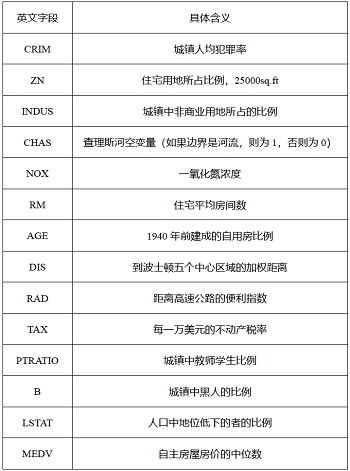

##  2.2 数据分割

数据分割是指将所有的样本数据按照一定比例随机分为2个组别。其中一组作为训练样本，用来训练模型，让模型能够认识到该组数据中存在的一种规律或规则；另一组作为测试样本，用真实的样本数据验证训练出来的模型是否是准确，为后续的预测模型的应用提供正确性描述。

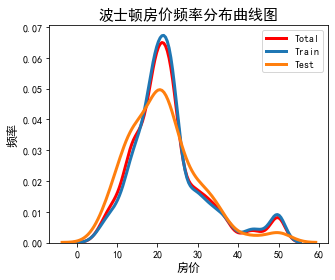

In [16]:
# 从sklearn.cross_validation导入数据分割器
from sklearn.model_selection import train_test_split

#导入 numpy并重命名为np
import numpy as np

import matplotlib.pyplot as plt
#将数据集中的数据转化为python可以更好计算的数组形式
X=boston.data #13项数值型特征
y=boston.target #1项目标房价

#随机采样25%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.25)

#由于画图时plt.title默认显示是英文，所以当我们需要设置标体为中文时，需要先设置系统环境,使得输出的标题为中文；
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

# 绘制目标房价频率分布直方图
#导入python绘图专用包，seaborn以及matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# 分析回归目标值的差异。
#定义绘图画布的大小
plt.figure(figsize=(5,4))
#分别绘制整个数据集、训练数据集、测试数据集的房价频率分布直方图
ax = sns.kdeplot(y,color='r',label='Total',lw=3)
ax2 = sns.kdeplot(y_train,label='Train',lw=3)
ax3 = sns.kdeplot(y_test,label='Test',lw=3)
#绘制横纵坐标轴
plt.xlabel('房价',fontdict={'size':12})
plt.ylabel('频率',fontdict={'size':12})
plt.title('波士顿房价频率分布曲线图',fontdict={'size':15})
plt.show()


从上图可以直观得到三个结论，首先是boston房价均值分布在22左右，同时用于训练的数据集和用于测试的数据集在数据特征上和原始数据集保持一致，但是房价的上限和下限之间存在过大的差距。

##  2.3 数据标准化

为了消除不同量级下13个特征指标对目标房价的影响，以及降低房价本身的影响，需要对特征值以及目标值进行标准化处理。

In [17]:
# # 从sklearn.preprocessing导入数据标准化模块。
# from sklearn.preprocessing import StandardScaler

# # 分别初始化对特征和目标值的标准化器。
# ss_X = StandardScaler()
# ss_y = StandardScaler()

# # 分别对训练和测试数据的特征以及目标值进行标准化处理,得到标准化后的训练集和测试集。
# X_train = ss_X.fit_transform(X_train)
# X_test = ss_X.transform(X_test)

# y_train = ss_y.fit_transform(y_train)
# y_test = ss_y.transform(y_test)

# 3、模型应用与分析

##  3.1 线性回归分析

### 3.1.1 线性回归预测

In [18]:
# 从sklearn.linear_model导入LinearRegression。
from sklearn.linear_model import LinearRegression

# 使用默认配置初始化线性回归器LinearRegression。
lr = LinearRegression()

# 使用训练数据进行参数估计。
lr.fit(X_train, y_train)

# 对测试数据进行回归预测。
lr_y_predict = lr.predict(X_test)

### 3.1.2 线性回归结果分析

通过绘制测试集和预测结果的散点分布图，不难看出，二者之间不重合的点较多，说明二者在预测的结果上存在一定的差距，预测准确性直观上不太高。

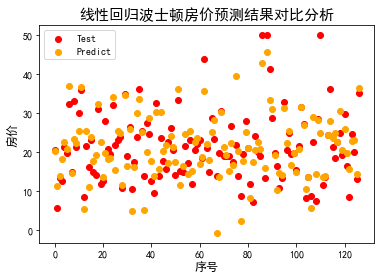

In [19]:
xx=[]
for i in range(len(y_test)):
    xx.append(i)
type1=plt.scatter(xx,y_test,color='r',label='Test')
type2=plt.scatter(xx,lr_y_predict,color='orange',label='Predict')
plt.xlabel('序号',fontdict={'size':12})
plt.ylabel('房价',fontdict={'size':12})
plt.title('线性回归波士顿房价预测结果对比分析',fontdict={'size':15})
plt.legend((type1,type2),("Test","Predict"))
plt.show()

为了更直观的看出来预测结果和测试数据集之间的差异，通过统计各个区段之间的房价形成房价频率分布直方图。图图中不难看出，二者仅在有限几个小区段内重叠，这说明预测房价和测试结果之间存在差异较大。

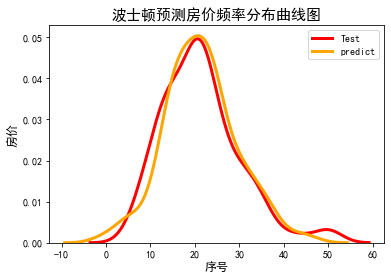

In [20]:
#通过绘制频率分布曲线探究房价和测试结果之间存在的差异
ax5 = sns.kdeplot(y_test,label='Test',color='r',lw=3)
ax4 = sns.kdeplot(lr_y_predict,label='predict',color='orange',lw=3)
plt.xlabel('序号',fontdict={'size':12})
plt.ylabel('房价',fontdict={'size':12})
plt.title('波士顿预测房价频率分布曲线图',fontdict={'size':15})
plt.show()

为充分量化预测值和测试值之间的差距，评估模型精度，这里导入线性回归模型自带的评估模块，输出评估结果为0.6757955，总的来说模型精度不太高。

In [21]:
print('模型性能得分为：',lr.score(X_test,y_test))

模型性能得分为： 0.6757955014529462


##  3.2 支持向量机分析

使用支持向量机进行预测过程中，核函数的不同会导致预测结果的显著不相同，因此本部分采用线性核函数、多项式核函数、径向基核函数进行预测分析，探究不同类型核函数对预测结果精度的影响程度。

### 3.2.1 支持向量机预测

In [22]:
# 从sklearn.svm中导入支持向量机（回归）模型。
from sklearn.svm import SVR

# 使用线性核函数配置的支持向量机进行回归训练，并且对测试样本进行预测。
linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)
linear_svr_y_predict = linear_svr.predict(X_test)

# 使用多项式核函数配置的支持向量机进行回归训练，并且对测试样本进行预测。
poly_svr = SVR(kernel='poly')
poly_svr.fit(X_train, y_train)
poly_svr_y_predict = poly_svr.predict(X_test)

# 使用径向基核函数配置的支持向量机进行回归训练，并且对测试样本进行预测。
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)
rbf_svr_y_predict = rbf_svr.predict(X_test)

### 3.2.2 支持向量机结果分析

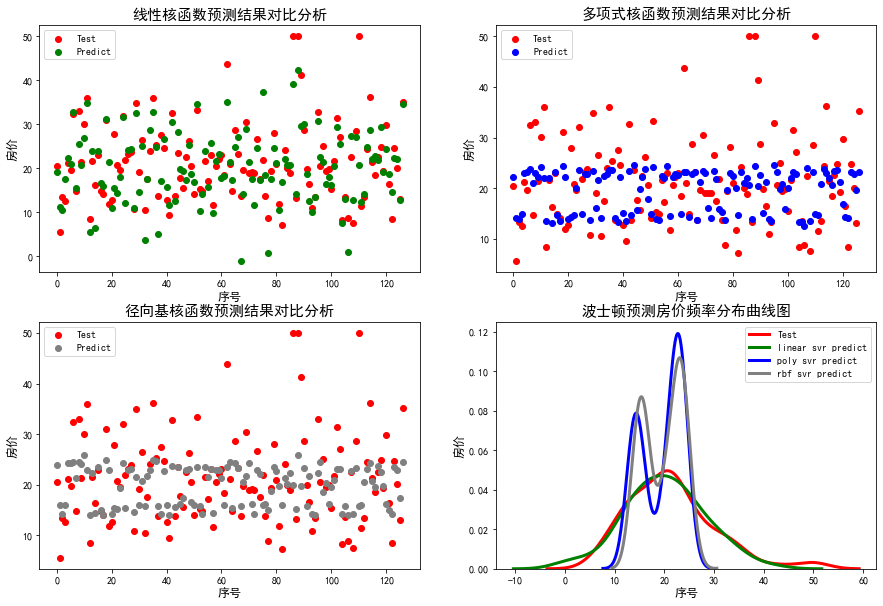

In [23]:
plt.figure(figsize=(15,10))

#分割出4个子图，并分别作图
for l in range(1,5):
    plt.subplot(2, 2, l)
    #绘制哪个指标的图就修改对应的标题名称
    plt.xlabel("序号",fontdict={'size':12})
    plt.ylabel("房价",fontdict={'size':12})
    #根据具体的图形，设置横纵坐标的刻度
    if l == 1:
        plt.title('线性核函数预测结果对比分析',fontdict={'size':15}) 
        type1=plt.scatter(xx,y_test,color='r',label='Test')
        type2=plt.scatter(xx,linear_svr_y_predict,color='green',label='Predict')
        plt.xlabel('序号',fontdict={'size':12})
        plt.ylabel('房价',fontdict={'size':12})
        plt.legend((type1,type2),("Test","Predict"))
    if l == 2:
        plt.title('多项式核函数预测结果对比分析',fontdict={'size':15}) 
        type1=plt.scatter(xx,y_test,color='r',label='Test')
        type2=plt.scatter(xx,poly_svr_y_predict,color='blue',label='Predict')
        plt.xlabel('序号',fontdict={'size':12})
        plt.ylabel('房价',fontdict={'size':12})
        plt.legend((type1,type2),("Test","Predict"))
    if l == 3:
        plt.title('径向基核函数预测结果对比分析',fontdict={'size':15}) 
        type1=plt.scatter(xx,y_test,color='r',label='Test')
        type2=plt.scatter(xx,rbf_svr_y_predict,color='grey',label='Predict')
        plt.xlabel('序号',fontdict={'size':12})
        plt.ylabel('房价',fontdict={'size':12})
        plt.legend((type1,type2),("Test","Predict"))
    if l == 4:
        ax5 = sns.kdeplot(y_test,label='Test',color='r',lw=3)
        ax4 = sns.kdeplot(linear_svr_y_predict,label='linear svr predict',color='green',lw=3)
        ax5 = sns.kdeplot(poly_svr_y_predict,label='poly svr predict',color='blue',lw=3)
        ax5 = sns.kdeplot(rbf_svr_y_predict,label='rbf svr predict',color='grey',lw=3)
        plt.xlabel('序号',fontdict={'size':12})
        plt.ylabel('房价',fontdict={'size':12})
        plt.title('波士顿预测房价频率分布曲线图',fontdict={'size':15})
plt.show()

图中线性核函数曲线与测试集曲线更为贴合，可以认为，基于线性核函数的支持向量机预测精度相较于基于多项式核函数、径向基核函数的支持向量机更高。

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
linear_svr.fit(X_train, y_train)
print ('R-squared value of linear SVR is', linear_svr.score(X_test, y_test))
print ('R-squared value of Poly SVR is', poly_svr.score(X_test, y_test))
print ('R-squared value of RBF SVR is', rbf_svr.score(X_test, y_test))

R-squared value of linear SVR is 0.6433098081925588
R-squared value of Poly SVR is 0.28820921480393236
R-squared value of RBF SVR is 0.28838455739462654


通过对上述三个核函数的结果进行性能评估，得到基于线性核函数的支持向量机预测精度为0.64，基于多项式核函数的支持向量机预测精度为0.29、基于径向基核函数的支持向量机预测精度也为0.29，故采用基于线性核函数对于该问题的预测效果更佳。

##  3.3 K-Means回归分析

### 3.3.1 K-Means回归预测

<font face="楷体" color=k size=4>K-Means模型是借助周围K个最近训练样本的目标数值，对待测样本的回归值进行决策。在确定最近的训练样本时，通常有两种方式：采用普通算数平均还是考虑距离差异的加权平均。本部分旨在探究不同的距离计算逻辑对K-Means预测结果的影响程度。

In [25]:
# 从sklearn.neighbors导入KNeighborRegressor（K近邻回归器）。
from sklearn.neighbors import KNeighborsRegressor

# 初始化K近邻回归器，并且调整配置，使得预测的方式为平均回归：weights='uniform'。
uni_knr = KNeighborsRegressor(weights='uniform')
uni_knr.fit(X_train, y_train)
uni_knr_y_predict = uni_knr.predict(X_test)

# 初始化K近邻回归器，并且调整配置，使得预测的方式为根据距离加权回归：weights='distance'。
dis_knr = KNeighborsRegressor(weights='distance')
dis_knr.fit(X_train, y_train)
dis_knr_y_predict = dis_knr.predict(X_test)

### 3.3.2 K-Means回归结果分析

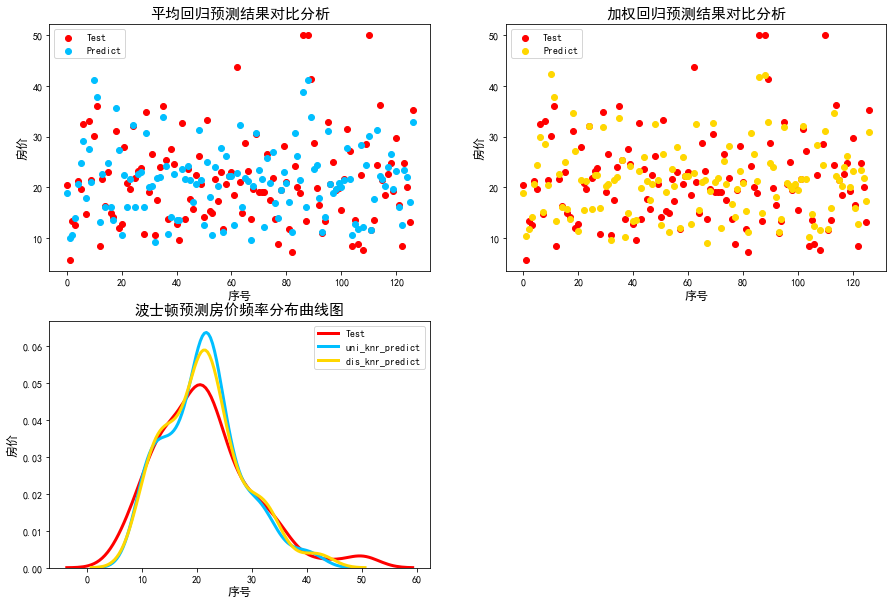

In [26]:
plt.figure(figsize=(15,10))

#分割出4个子图，并分别作图
for l in range(1,4):
    plt.subplot(2, 2, l)
    #绘制哪个指标的图就修改对应的标题名称
    plt.xlabel("序号",fontdict={'size':12})
    plt.ylabel("房价",fontdict={'size':12})
    #根据具体的图形，设置横纵坐标的刻度
    if l == 1:
        plt.title('平均回归预测结果对比分析',fontdict={'size':15}) 
        type1=plt.scatter(xx,y_test,color='r',label='Test')
        type2=plt.scatter(xx,uni_knr_y_predict,color='deepskyblue',label='Predict')
        plt.xlabel('序号',fontdict={'size':12})
        plt.ylabel('房价',fontdict={'size':12})
        plt.legend((type1,type2),("Test","Predict"))
    if l == 2:
        plt.title('加权回归预测结果对比分析',fontdict={'size':15}) 
        type1=plt.scatter(xx,y_test,color='r',label='Test')
        type2=plt.scatter(xx,dis_knr_y_predict,color='gold',label='Predict')
        plt.xlabel('序号',fontdict={'size':12})
        plt.ylabel('房价',fontdict={'size':12})
        plt.legend((type1,type2),("Test","Predict"))
    if l == 3:
        ax5 = sns.kdeplot(y_test,label='Test',color='r',lw=3)
        ax5 = sns.kdeplot(uni_knr_y_predict,label='uni_knr_predict',color='deepskyblue',lw=3)
        ax5 = sns.kdeplot(dis_knr_y_predict,label='dis_knr_predict',color='gold',lw=3)
        plt.xlabel('序号',fontdict={'size':12})
        plt.ylabel('房价',fontdict={'size':12})
        plt.title('波士顿预测房价频率分布曲线图',fontdict={'size':15})
plt.show()

In [27]:
# 使用R-squared、MSE以及MAE三种指标对平均回归配置的K近邻模型在测试集上进行性能评估。
print ('R-squared value of uniform-weighted KNeighorRegression:', uni_knr.score(X_test, y_test))
print ('R-squared value of distance-weighted KNeighorRegression:', dis_knr.score(X_test, y_test))

R-squared value of uniform-weighted KNeighorRegression: 0.6406342556368118
R-squared value of distance-weighted KNeighorRegression: 0.6556106730108653


##  3.4 模型性能对比分析

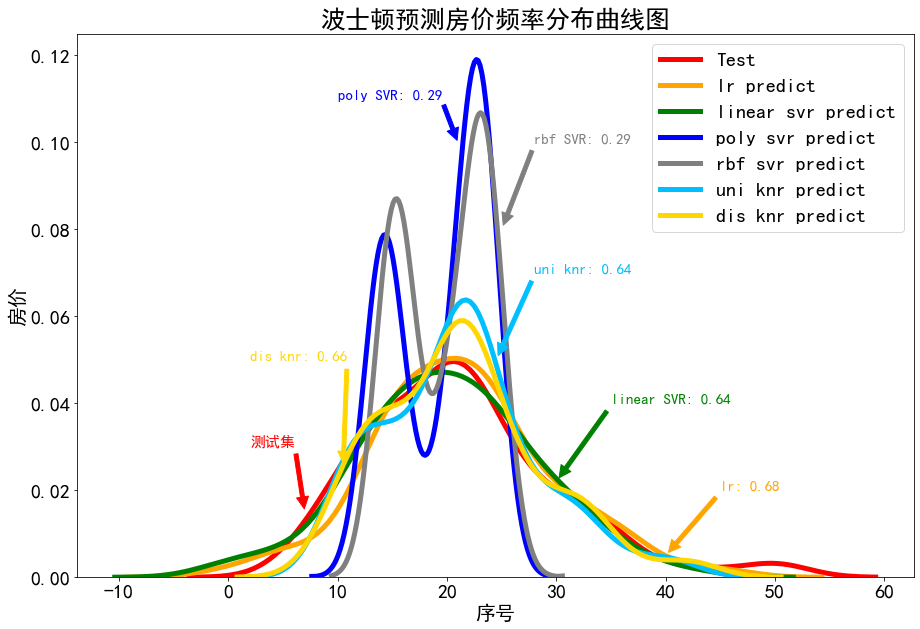

In [28]:
plt.figure(figsize=(15,10))
fontsize_pic=5
ax5 = sns.kdeplot(y_test,label='Test',color='r',lw=fontsize_pic)
ax5 = sns.kdeplot(lr_y_predict,label='lr predict',color='orange',lw=fontsize_pic)
ax5 = sns.kdeplot(linear_svr_y_predict,label='linear svr predict',color='green',lw=fontsize_pic)
ax5 = sns.kdeplot(poly_svr_y_predict,label='poly svr predict',color='blue',lw=fontsize_pic)
ax5 = sns.kdeplot(rbf_svr_y_predict,label='rbf svr predict',color='grey',lw=fontsize_pic)
ax5 = sns.kdeplot(uni_knr_y_predict,label='uni knr predict',color='deepskyblue',lw=fontsize_pic)
ax5 = sns.kdeplot(dis_knr_y_predict,label='dis knr predict',color='gold',lw=fontsize_pic)
plt.xlabel('序号',fontdict={'size':20})
plt.ylabel('房价',fontdict={'size':20})
plt.title('波士顿预测房价频率分布曲线图',fontdict={'size':25})
plt.tick_params(labelsize=20)  
plt.legend(fontsize=20)

plt.annotate('测试集', xy=(7, 0.015), xytext=(2, 0.03),weight='bold',color='r',fontsize=15,\
            xycoords='data',
            arrowprops=dict(color='r', shrink=0.05)
            )
plt.annotate('lr: 0.68', xy=(40, 0.005), xytext=(45, 0.02),weight='bold',color='orange',fontsize=15,\
            xycoords='data',
            arrowprops=dict(color='orange', shrink=0.05)
            )
plt.annotate('linear SVR: 0.64', xy=(30, 0.022), xytext=(35, 0.04),weight='bold',color='green',fontsize=15,\
            xycoords='data',
            arrowprops=dict(color='green', shrink=0.05)
            )
plt.annotate('poly SVR: 0.29', xy=(21, 0.10), xytext=(10, 0.11),weight='bold',color='blue',fontsize=15,\
            xycoords='data',
            arrowprops=dict(color='blue', shrink=0.05)
            )
plt.annotate('rbf SVR: 0.29', xy=(25, 0.08), xytext=(28, 0.1),weight='bold',color='grey',fontsize=15,\
            xycoords='data',
            arrowprops=dict(color='grey', shrink=0.05)
            )
plt.annotate('uni knr: 0.64', xy=(24.5, 0.05), xytext=(28, 0.07),weight='bold',color='deepskyblue',fontsize=15,\
            xycoords='data',
            arrowprops=dict(color='deepskyblue', shrink=0.05)
            )
plt.annotate('dis knr: 0.66', xy=(10.5, 0.025), xytext=(2, 0.05),weight='bold',color='gold',fontsize=15,\
            xycoords='data',
            arrowprops=dict(color='gold', shrink=0.05)
            )

plt.show()

通过对比以上6种预测模型，从图像特征来看，线性回归预测模型，基于线性核函数的支持向量机预测模型，平均回归K-Means,加权回归K-Means四种模型与测试集图像贴合，说明4种模型能够较好反应改组数据的规律。同时通过精确的量化结果看出，在上述四种较为优越的模型中，线性回归预测模型具有更好的预测精度，达到0.68，其余3种较为优越的模型预测精度也都达到0.6以上，但是也都没有达到0.7及以上，说明上述的4种模型性能只能称为一般，而不是卓越。